## 이진 분류 (Binary Classification)

- 분석 대상 데이터: **은행 고객 이탈 여부 데이터셋**

#### Features

- Surname: 고객의 성(성씨)을 레이블 인코딩으로 변환한 값
- Surname_tfidf_0 ~ Surname_tfidf_4: TFIDF Vectorizer<sub>1)</sub>을 통해 수치화한 고객의 성(성씨)  
    
<sub>1) Term Frequency (단어 빈도): 특정 단어가 문서 내에서 등장하는 횟수를 나타냅니다. 이 값이 높을수록 해당 단어가 문서에서 중요하다고 간주됩니다.</sub>  
<sub>1) Inverse Document Frequency (역문서 빈도): 이는 특정 단어가 여러 문서에서 얼마나 자주 등장하는지를 나타냅니다. 이 값이 낮을수록 해당 단어가 문서를 구분하는 데 더 중요하다고 간주됩니다.</sub>

- Credit Score: 고객의 신용 점수
- Age: 고객의 나이
- Tenure: 은행에서 고객으로 유지한 기간
- Balance: 계좌 잔고
- NumOfProducts: 고객이 사용하고 있는 은행 상품의 개수
- HasCrCard: 고객의 신용카드 보유 여부 (0: 미보유, 1: 보유)
- IsActiveMember: 고객이 활동 중인 고객인지의 여부 (0: 미활동, 1: 활동)
- EstimatedSalary: 고객의 추정 연봉
- Germany, France, Spain: 원핫 인코딩된 고객 거주 국가 Feature
- Male, Female: 원핫 인코딩된 고객의 성별 Feature
- Mem__no__products: NumOfProducts 와 IsActiveMember의 곱
- Cred_Bal_Sal: 신용점수와 계좌 잔고를 곱한 값을 추정 연봉으로 나눈 값
- Bal_sal: 계좌 잔고를 추정 연봉으로 나눈 값
- Tenure_Age: 은행에서 고객으로 유지한 기간을 나이로 나눈 값
- Age_Tenure_product: 나이와 은행에서 고객으로 유지한 기간을 곱한 값

#### Target

- Exited: 고객의 이탈 여부 (0: 미이탈, 1: 이탈)

---
### 1. 데이터 탐색 및 전처리

#### 1) 데이터 탐색

In [1]:
import pandas as pd
import numpy as np

churn_df = pd.read_csv("./datasets/churn_dataset.csv")
churn_df.columns

Index(['Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2',
       'Surname_tfidf_3', 'Surname_tfidf_4', 'France', 'Germany', 'Spain',
       'Female', 'Male', 'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal',
       'Tenure_Age', 'Age_Tenure_product'],
      dtype='object')

In [2]:
churn_df

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.090909,99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.50,0,...,1,0,0,0,1,2.0,0.000000,0.000000,0.030303,33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.250000,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,...,1,0,0,0,1,1.0,1022.940581,1.760655,0.058824,68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,...,0,0,1,0,1,2.0,0.000000,0.000000,0.151515,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,2226,644.0,28.0,7.0,155060.41,1.0,1,0,29179.52,0,...,1,0,0,0,1,0.0,3422.225727,5.314015,0.250000,196.0
175024,2846,800.0,29.0,2.0,0.00,2.0,0,0,167773.55,0,...,1,0,0,1,0,0.0,0.000000,0.000000,0.068966,58.0
175025,1999,771.0,39.0,5.0,0.00,2.0,1,0,96270.64,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.128205,195.0
175026,1336,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,0,...,1,0,0,0,1,1.0,291.079505,0.564108,0.285714,350.0


In [3]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175028 entries, 0 to 175027
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Surname             175028 non-null  int64  
 1   CreditScore         175028 non-null  float64
 2   Age                 175028 non-null  float64
 3   Tenure              175028 non-null  float64
 4   Balance             175028 non-null  float64
 5   NumOfProducts       175028 non-null  float64
 6   HasCrCard           175028 non-null  int64  
 7   IsActiveMember      175028 non-null  int64  
 8   EstimatedSalary     175028 non-null  float64
 9   Exited              175028 non-null  int64  
 10  Surname_tfidf_0     175028 non-null  float64
 11  Surname_tfidf_1     175028 non-null  float64
 12  Surname_tfidf_2     175028 non-null  float64
 13  Surname_tfidf_3     175028 non-null  float64
 14  Surname_tfidf_4     175028 non-null  float64
 15  France              175028 non-nul

In [4]:
# 범주형 데이터들이 올바르게 0과 1로 되어있는지 검사합니다.
categorical_columns = ['HasCrCard', 'IsActiveMember', 'Exited', 'France', 'Germany', 'Spain', 'Female', 'Male']
for categorical_column in categorical_columns:
    display(churn_df[categorical_column].value_counts())

HasCrCard
1    131478
0     43550
Name: count, dtype: int64

IsActiveMember
0    87732
1    87296
Name: count, dtype: int64

Exited
0    138071
1     36957
Name: count, dtype: int64

France
1    99225
0    75803
Name: count, dtype: int64

Germany
0    137914
1     37114
Name: count, dtype: int64

Spain
0    136339
1     38689
Name: count, dtype: int64

Female
0    98603
1    76425
Name: count, dtype: int64

Male
1    98603
0    76425
Name: count, dtype: int64

#### 2) 중복행, 결측치 검사

In [5]:
churn_df.duplicated().sum()

69

In [6]:
# 중복행 제거
churn_df.drop_duplicates(inplace=True)

In [7]:
churn_df.duplicated().sum()

0

In [8]:
# 결측치 검사
churn_df.isna().sum()

Surname               0
CreditScore           0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Surname_tfidf_0       0
Surname_tfidf_1       0
Surname_tfidf_2       0
Surname_tfidf_3       0
Surname_tfidf_4       0
France                0
Germany               0
Spain                 0
Female                0
Male                  0
Mem__no__Products     0
Cred_Bal_Sal          0
Bal_sal               0
Tenure_Age            0
Age_Tenure_product    0
dtype: int64

In [9]:
churn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Surname,174959.0,1617.533685,813.848221,0.000000,9.490000e+02,1666.000000,2.292000e+03,2.931000e+03
CreditScore,174959.0,656.121200,81.141307,350.000000,5.970000e+02,659.000000,7.100000e+02,8.500000e+02
Age,174959.0,38.171405,8.968572,18.000000,3.200000e+01,37.000000,4.200000e+01,9.200000e+01
Tenure,174959.0,5.020119,2.811189,0.000000,3.000000e+00,5.000000,7.000000e+00,1.000000e+01
Balance,174959.0,56682.011990,62984.530626,0.000000,0.000000e+00,0.000000,1.207313e+05,2.508981e+05
NumOfProducts,174959.0,1.553015,0.549226,1.000000,1.000000e+00,2.000000,2.000000e+00,4.000000e+00
HasCrCard,174959.0,0.751193,0.432323,0.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00
IsActiveMember,174959.0,0.498717,0.500000,0.000000,0.000000e+00,0.000000,1.000000e+00,1.000000e+00
EstimatedSalary,174959.0,111862.777997,50813.118139,11.580000,7.322531e+04,116969.730000,1.547673e+05,1.999925e+05
Exited,174959.0,0.211209,0.408168,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000e+00


#### 3) 시각화를 통한 분포 확인
- 데이터 전처리를 위해 분포를 시각화해봅니다.

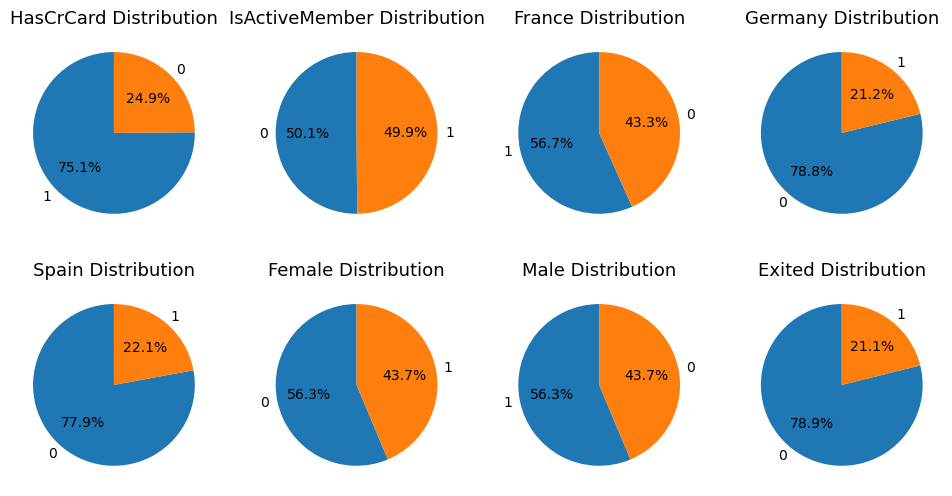

In [10]:
# 범주형 데이터에 대하여 파이차트로 분포를 시각화합니다.
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

categorical_columns = ['HasCrCard', 'IsActiveMember', 'France', 'Germany', 'Spain', 'Female', 'Male', 'Exited']

for i in range(8):
    column = categorical_columns[i]
    value_dict = dict(churn_df[column].value_counts())
    labels = list(value_dict.keys())
    values = list(value_dict.values())
    axes[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{column} Distribution', fontsize=13)
plt.show()

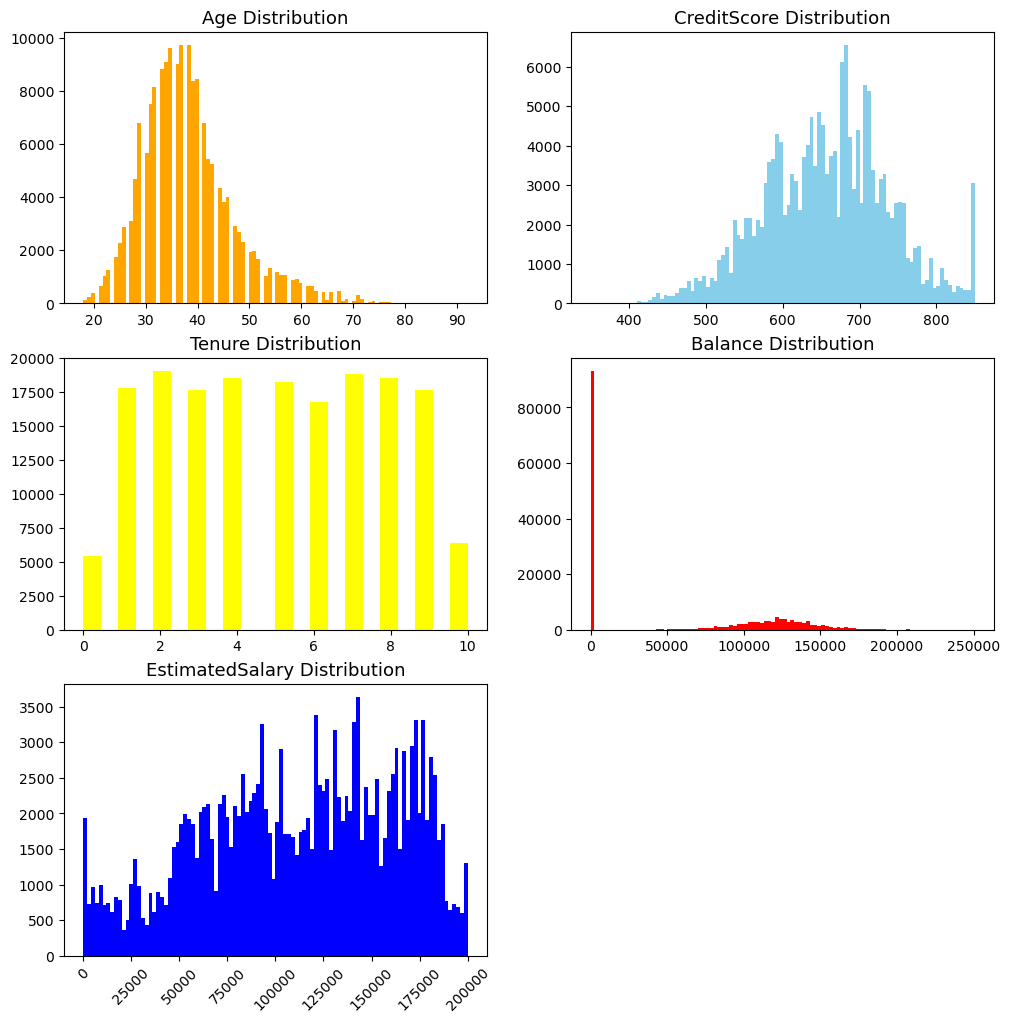

In [11]:
# 수치형 데이터 중 CreditScore, Age, Tenure, Balance, EstimatedSalary의 분포를 시각화합니다.
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

axes = axes.flatten()

axes[0].hist(churn_df['Age'], bins=100, color="orange")
axes[0].set_title('Age Distribution', fontsize=13)
axes[1].hist(churn_df['CreditScore'], bins=100, color="skyblue")
axes[1].set_title('CreditScore Distribution', fontsize=13)
axes[2].hist(churn_df['Tenure'], bins=22, color="yellow")
axes[2].set_title('Tenure Distribution', fontsize=13)
axes[3].hist(churn_df['Balance'], bins=100, color="red")
axes[3].set_title('Balance Distribution', fontsize=13)
axes[4].hist(churn_df['EstimatedSalary'], bins=100, color="blue")
axes[4].set_title('EstimatedSalary Distribution', fontsize=13)
axes[4].tick_params(axis='x', rotation=45)
axes[-1].axis('off')
plt.show()

In [12]:
# 0의 비율이 높은 Balance feature에 대해 값이 0인 행의 비율을 살펴봅니다.
import numpy as np

zero_feature = 'Balance'

total_count = churn_df.shape[0]

zero_count = churn_df[churn_df[zero_feature] == 0][zero_feature].count()
print(f'{zero_feature}: {zero_count}건, {np.round(zero_count / total_count * 100, 4)}%')

Balance: 93222건, 53.2822%


In [13]:
# Balance feature에서 값이 0인 비율이 약 53%이므로 이를 대체하기 위해 0이 아닌 값의 분포를 살펴봅니다.
churn_df[churn_df['Balance'] != 0][['Balance']].describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,81737.0,121328.5065,25456.154863,18.33,104796.54,122104.79,137841.53,250898.09


In [14]:
# 평균과 중앙값의 차이가 작으므로 평균값으로 대체해도 무방하다고 판단하여 평균값으로 값이 0인 행을 대체합니다.
churn_df.loc[churn_df['Balance'] == 0, 'Balance'] = churn_df.loc[churn_df['Balance'] != 0, 'Balance'].mean()
churn_df['Balance'].mean()

121328.50650011626

In [15]:
zero_feature = 'Balance'

total_count = churn_df.shape[0]

zero_count = churn_df[churn_df[zero_feature] == 0][zero_feature].count()
print(f'{zero_feature}: {zero_count}건, {np.round(zero_count / total_count * 100, 4)}%')

Balance: 0건, 0.0%


#### 4) 이상치 검사

- StandardScaler을 통해 표준화하여 이상치를 검사하고 제거합니다.
- Surname 관련 feature들은 범주형 데이터를 수치화한 값이므로 제외합니다.
- 마찬가지로 범주형 데이터를 수치화한 feature들(HasCrCard, IsActiveMember 등)을 제외합니다.
- 또한 target인 'Exited'를 제외합니다.

In [16]:
print(churn_df.columns)

Index(['Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2',
       'Surname_tfidf_3', 'Surname_tfidf_4', 'France', 'Germany', 'Spain',
       'Female', 'Male', 'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal',
       'Tenure_Age', 'Age_Tenure_product'],
      dtype='object')


In [17]:
from sklearn.preprocessing import StandardScaler

features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 
           'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal', 'Tenure_Age', 'Age_Tenure_product'
          ]

for feature in features:
    temp_df = churn_df.loc[:, feature].reset_index()
    std = StandardScaler()
    std_feature = std.fit_transform(temp_df[[feature]])
    temp_df[feature] = std_feature
    cond1 = temp_df[feature] >= -1.96
    cond2 = temp_df[feature] <= 1.96
    cond = cond1 & cond2

    churn_df = churn_df.iloc[temp_df[cond].index].reset_index(drop=True)

display(churn_df)

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,121328.5065,2.0,1,0,181449.97,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.090909,99.0
1,2024,627.0,33.0,1.0,121328.5065,2.0,1,1,49503.50,0,...,1,0,0,0,1,2.0,0.000000,0.000000,0.030303,33.0
2,1236,678.0,40.0,10.0,121328.5065,2.0,1,0,184866.69,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.250000,400.0
3,491,716.0,33.0,5.0,121328.5065,2.0,1,1,15068.83,0,...,0,0,1,0,1,2.0,0.000000,0.000000,0.151515,165.0
4,984,588.0,36.0,4.0,131778.5800,1.0,1,0,136024.31,1,...,0,1,0,0,1,0.0,569.646742,0.968787,0.111111,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115392,29,597.0,53.0,4.0,88381.2100,1.0,1,0,69384.71,1,...,1,0,0,1,0,0.0,760.449707,1.273785,0.075472,212.0
115393,540,726.0,36.0,2.0,121328.5065,1.0,1,0,195192.40,0,...,0,0,1,0,1,0.0,0.000000,0.000000,0.055556,72.0
115394,2846,800.0,29.0,2.0,121328.5065,2.0,0,0,167773.55,0,...,1,0,0,1,0,0.0,0.000000,0.000000,0.068966,58.0
115395,1999,771.0,39.0,5.0,121328.5065,2.0,1,0,96270.64,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.128205,195.0


#### 5) 타겟 위치를 마지막 열로 이동
- target에 해당하는 Exited 컬럼을 가장 끝 열로 이동합니다.

In [18]:
target_column = 'Exited'
churn_df = pd.concat([churn_df.drop(columns=[target_column]), churn_df[target_column]], axis=1)
churn_df

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Surname_tfidf_0,...,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product,Exited
0,2023,668.0,33.0,3.0,121328.5065,2.0,1,0,181449.97,-3.124437e-07,...,0,0,0,1,0.0,0.000000,0.000000,0.090909,99.0,0
1,2024,627.0,33.0,1.0,121328.5065,2.0,1,1,49503.50,4.813383e-07,...,0,0,0,1,2.0,0.000000,0.000000,0.030303,33.0,0
2,1236,678.0,40.0,10.0,121328.5065,2.0,1,0,184866.69,-3.447294e-04,...,0,0,0,1,0.0,0.000000,0.000000,0.250000,400.0,0
3,491,716.0,33.0,5.0,121328.5065,2.0,1,1,15068.83,-1.037135e-07,...,0,1,0,1,2.0,0.000000,0.000000,0.151515,165.0,0
4,984,588.0,36.0,4.0,131778.5800,1.0,1,0,136024.31,-7.737153e-04,...,1,0,0,1,0.0,569.646742,0.968787,0.111111,144.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115392,29,597.0,53.0,4.0,88381.2100,1.0,1,0,69384.71,-7.457062e-12,...,0,0,1,0,0.0,760.449707,1.273785,0.075472,212.0,1
115393,540,726.0,36.0,2.0,121328.5065,1.0,1,0,195192.40,3.268990e-09,...,0,1,0,1,0.0,0.000000,0.000000,0.055556,72.0,0
115394,2846,800.0,29.0,2.0,121328.5065,2.0,0,0,167773.55,-1.510370e-12,...,0,0,1,0,0.0,0.000000,0.000000,0.068966,58.0,0
115395,1999,771.0,39.0,5.0,121328.5065,2.0,1,0,96270.64,-1.510370e-12,...,0,0,0,1,0.0,0.000000,0.000000,0.128205,195.0,0


### 2. 데이터 세트 분리

- 앞서 데이터 탐색 과정에서 target에 해당하는 Exited 값의 비율 분포가 0과 1 중 0으로 치우쳐 있는 사실을 발견하였으므로,  
  훈련 및 테스트 데이터 분리 이전에 1 값을 가진 행의 개수와 0 값을 가진 행의 개수가 동일해질 수 있도록 샘플링을 진행합니다.

In [19]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

sample_size = dict(churn_df['Exited'].value_counts())[1]
sampled_zeros = churn_df[churn_df['Exited'] == 0].sample(n=sample_size, random_state=124)
sampled_ones = churn_df[churn_df['Exited'] == 1]
sampled_df = pd.concat([sampled_zeros, sampled_ones])

In [20]:
sampled_df['Exited'].value_counts()

Exited
0    20055
1    20055
Name: count, dtype: int64

In [21]:
features, targets = sampled_df.iloc[:, :-1], sampled_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

### 3. GridSearchCV를 활용하여 교차 검증 진행
- GridSearchCV를 활용하여 교차 검증을 진행함으로써 최적의 하이퍼파라미터(max_depth, min_samples_split) 값을 찾아냅니다.

In [22]:
dtc = DecisionTreeClassifier()
parameters = {'max_depth': [5, 6, 7], 'min_samples_split': [7, 8, 9]}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=8, refit=True, return_train_score=True)

# 교차 검증 진행
g_dtc.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [7, 8, 9]},
             return_train_score=True)

In [23]:
pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 5, 'min_samples_split': 7}",0.790358,8,0.795812,0.790576,0.783346
1,"{'max_depth': 5, 'min_samples_split': 8}",0.790358,8,0.795812,0.790576,0.783346
2,"{'max_depth': 5, 'min_samples_split': 9}",0.790389,7,0.796061,0.790576,0.783346
3,"{'max_depth': 6, 'min_samples_split': 7}",0.801826,1,0.803540,0.799053,0.804787
4,"{'max_depth': 6, 'min_samples_split': 8}",0.801826,1,0.803540,0.799053,0.804787
5,"{'max_depth': 6, 'min_samples_split': 9}",0.801826,1,0.803540,0.799053,0.804787
6,"{'max_depth': 7, 'min_samples_split': 7}",0.797993,6,0.803790,0.795562,0.802792
7,"{'max_depth': 7, 'min_samples_split': 8}",0.798055,4,0.804787,0.795562,0.802792
8,"{'max_depth': 7, 'min_samples_split': 9}",0.798055,4,0.804787,0.795313,0.802543


In [24]:
print("# 최적의 하이퍼 파라미터")
for param, value in g_dtc.best_params_.items():
    print(f'{param}의 최적값: {value}')
print("=" * 40)
print("# 최고 점수")
print(g_dtc.best_score_)

# 최적의 하이퍼 파라미터
max_depth의 최적값: 6
min_samples_split의 최적값: 7
# 최고 점수
0.8018262278733482


### 4. graphviz를 활용하여 DecisionTreeClassifier 시각화하기

In [25]:
from copy import deepcopy

graph_dtc = deepcopy(g_dtc.best_estimator_)

In [26]:
# graphviz를 통해 DecisionTreeClassifier를 시각화합니다.
from sklearn.tree import export_graphviz

export_graphviz(
    graph_dtc,
    out_file="./images/churn_dtc01.dot",
    feature_names=features.columns,
    impurity=True,
    filled=True
)

In [27]:
import graphviz

with open("./images/churn_dtc01.dot") as f:
    churn_dtc01 = f.read()

churn_dtc01_graph = graphviz.Source(churn_dtc01)

In [28]:
churn_dtc01_graph.render(filename="churn_dtc01", directory="./images", format="png")

'images\\churn_dtc01.png'

<img src="./images/churn_dtc01.png">

<img src="./images/graph03.png">

<img src="./images/graph02.png">

<img src="./images/graph04.png">

<img src="./images/graph05.png">

<img src="./images/graph06.png">

<img src="./images/graph07.png">

<img src="./images/graph08.png">

<img src="./images/graph09.png">

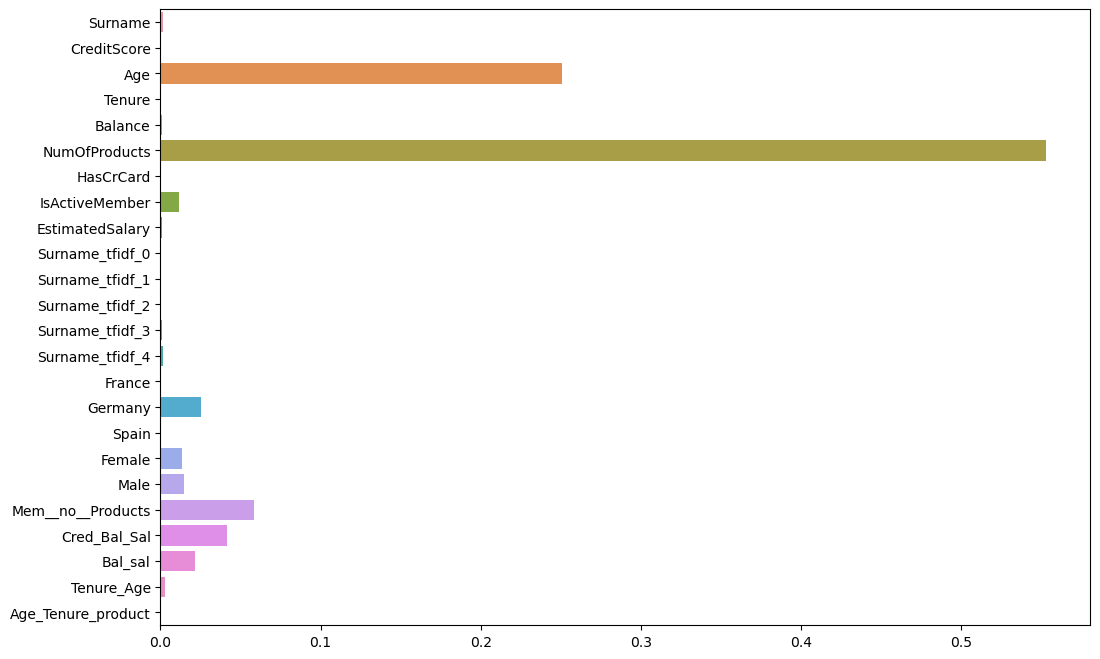

In [29]:
# sns의 barplot을 통해 feature_importances를 시각화해봅니다.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=graph_dtc.feature_importances_, y=features.columns)
plt.show()

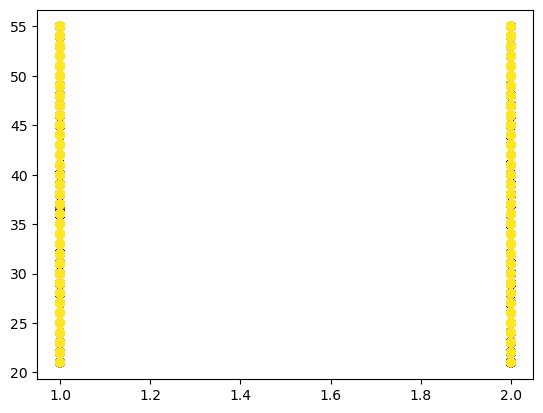

In [30]:
# feature_importances_가 높은 상위 2개 features(Age, NumOfProducts)에 대해 scatter을 통해 시각화합니다.
plt.scatter(features.loc[:, 'NumOfProducts'], features.loc[:, 'Age'], c=targets)
plt.show()

In [31]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

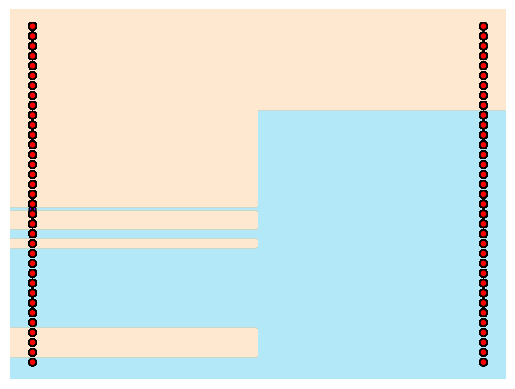

In [32]:
features_5_2 = features.iloc[:, [5, 2]]
visualize_boundary(dtc, features_5_2, targets)

### 5. 예측(predict) 수행
- <code>GridSearchCV</code>를 통해 찾은 최적의 하이퍼 파라미터로 학습한 dtc 모델로 테스트 데이터에 대한 예측을 수행합니다.
- 예측 결과를 실제 정답(<code>y_test</code>)과 비교하여 정확도(<code>accuracy_score</code>)를 구합니다.

In [33]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 79.1947%


### 6. 오차 행렬 (Confusion Matrix)
- 예측 결과를 바탕으로 오차 행렬을 구해봅니다.

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, visualize=False):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if visualize:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_predictions(y_test, prediction, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[3153  858]
 [ 811 3200]]
정확도: 0.7919, 정밀도: 0.7886, 재현율: 0.7978, F1: 0.7932, ROC-AUC: 0.7919
################################################################################


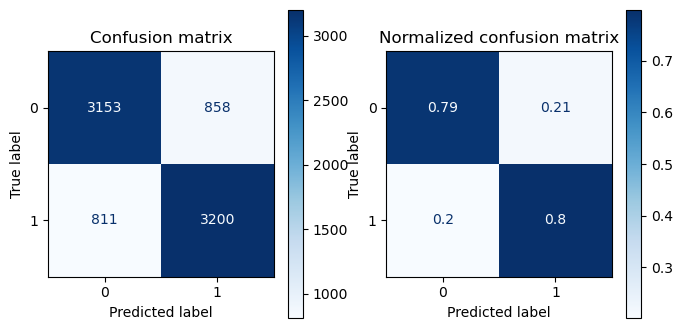

In [35]:
get_evaluation(y_test, prediction, visualize=True)

### 7. 세부 조정을 위한 proba(확률) 구하기

In [36]:
proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

for proba, predict in zip(proba.tolist(), prediction.tolist()):
    print(proba, predict)

[0.1518987341772152, 0.8481012658227848] 1
[0.7636363636363637, 0.23636363636363636] 0
[0.7636363636363637, 0.23636363636363636] 0
[0.6337115072933549, 0.36628849270664504] 0
[0.15514592933947774, 0.8448540706605223] 1
[0.03689101661503802, 0.963108983384962] 1
[0.03689101661503802, 0.963108983384962] 1
[0.915, 0.085] 0
[0.6778443113772455, 0.3221556886227545] 0
[0.9438103599648815, 0.056189640035118525] 0
[0.6260657734470159, 0.37393422655298414] 0
[0.9224274406332453, 0.07757255936675461] 0
[0.915, 0.085] 0
[0.9699129057798892, 0.030087094220110848] 0
[0.9438103599648815, 0.056189640035118525] 0
[0.9438103599648815, 0.056189640035118525] 0
[0.14095744680851063, 0.8590425531914894] 1
[0.7729411764705882, 0.22705882352941176] 0
[0.9699129057798892, 0.030087094220110848] 0
[0.15514592933947774, 0.8448540706605223] 1
[0.5207667731629393, 0.4792332268370607] 0
[0.9699129057798892, 0.030087094220110848] 0
[0.12080536912751678, 0.8791946308724832] 1
[0.061946902654867256, 0.9380530973451328

In [37]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

In [38]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[3153  858]
 [ 811 3200]]
정확도: 0.7919, 정밀도: 0.7886, 재현율: 0.7978, F1: 0.7932, ROC-AUC: 0.7919
################################################################################


In [39]:
# 테스트 데이터의 정답(y_test), 정답을 1로 예측할 확률을 담은 1차원 np.array를 2차원으로 변환한 proba_class1 및 thresholds를
# 입력받아 오차 행렬 및 평가 지표들을 출력하는 함수입니다.

thresholds = [0.24, 0.3, 0.4, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.7]

def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

get_evaluation_by_thresholds(y_test, proba[:, 1].reshape(-1, 1), thresholds)

0.24
오차 행렬
[[2437 1574]
 [ 314 3697]]
정확도: 0.7646, 정밀도: 0.7014, 재현율: 0.9217, F1: 0.7966, ROC-AUC: 0.7646
################################################################################
0.3
오차 행렬
[[2526 1485]
 [ 353 3658]]
정확도: 0.7709, 정밀도: 0.7113, 재현율: 0.9120, F1: 0.7992, ROC-AUC: 0.7709
################################################################################
0.4
오차 행렬
[[2950 1061]
 [ 607 3404]]
정확도: 0.7921, 정밀도: 0.7624, 재현율: 0.8487, F1: 0.8032, ROC-AUC: 0.7921
################################################################################
0.5
오차 행렬
[[3153  858]
 [ 811 3200]]
정확도: 0.7919, 정밀도: 0.7886, 재현율: 0.7978, F1: 0.7932, ROC-AUC: 0.7919
################################################################################
0.51
오차 행렬
[[3168  843]
 [ 830 3181]]
정확도: 0.7914, 정밀도: 0.7905, 재현율: 0.7931, F1: 0.7918, ROC-AUC: 0.7914
################################################################################
0.52
오차 행렬
[[3168  843]
 [ 830 3181]]
정확도: 0.7914, 정밀도: 0.7905, 재현율: 0.79

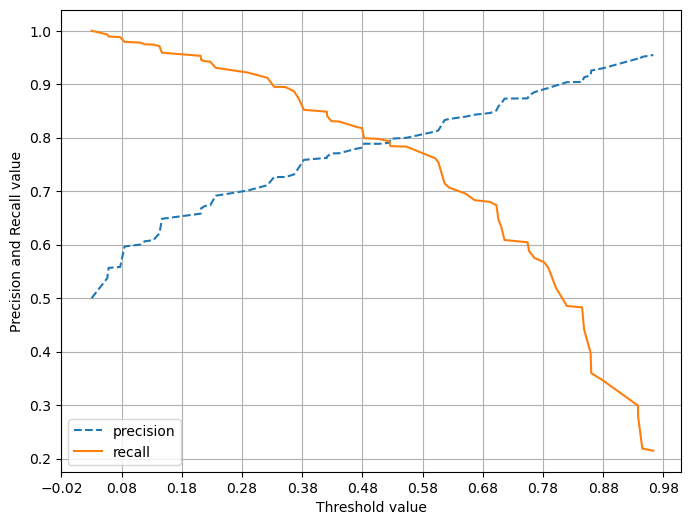

In [40]:
# 정밀도(precision)와 재현율(recall)의 trade-off를 시각화하는 함수입니다.
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

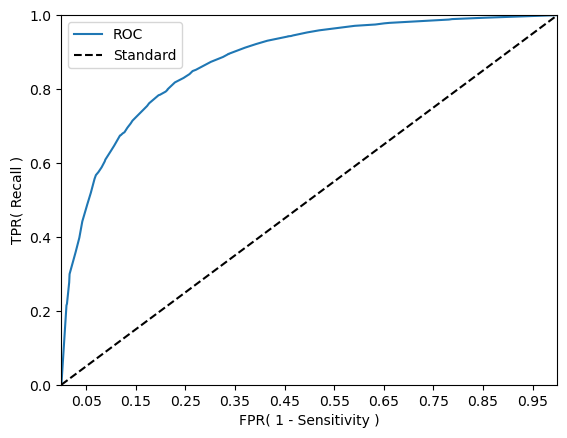

In [41]:
# FPR과 TPR의 변화에 따른 ROC Curve를 시각화하는 함수입니다.
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

### 8. 정밀도, 재현율 중 어느 것에 중점을 두어야 하는가?

- 해당 모델은 은행의 고객이 이탈(1, Positive)할지, 이탈하지 않을지(0, Negative)를 예측하는 모델입니다.
- 이때 TP, FP, TN, FN은 아래와 같습니다.

> True Positive (TP): 모델이 이탈할 고객을 이탈할 고객으로 올바르게 분류한 경우.    
> False Positive (FP): 모델이 이탈하지 않을 고객을 이탈할 고객으로 잘못 분류한 경우(error I).  
> True Negative (TN): 모델이 이탈하지 않을 고객을 이탈하지 않을 고객으로 올바르게 분류한 경우.  
> False Negative (FN): 모델이 이탈할 고객을 이탈하지 않을 고객으로 잘못 분류한 경우(놓치는 경우, error II).  

- 따라서 정밀도(Precision)와 재현율(Recall)은 아래와 같이 수립됩니다.

> 정밀도 (Precision): 모델이 이탈할 고객으로 예측한 고객 중에서 실제로 이탈한 고객의 비율을 나타냅니다. 즉, 양성 클래스로 예측한 결과 중 얼마나 많은 것이 진짜 양성인지 측정합니다.  
> 재현율 (Recall): 실제로 이탈한 고객 중에서 모델이 이탈 고객으로 정확하게 예측한 고객의 비율을 나타냅니다. 즉, 모델이 얼마나 많은 이탈 고객을 "놓치지 않고" 감지했는지 측정합니다.  

- 🏆모델이 이탈할 고객을 이탈하지 않을 고객으로 잘못 분류하여 놓치는 경우(FN)의 피해가 이탈하지 않을 고객을 이탈 고객으로 잘못 분류한 경우(FP)의 피해보다 나쁘기 때문에, FN을 낮추기 위해 **임계치를 낮춤으로써 재현율을 높여주는 것**이 적절하다고 판단됩니다.

### 9. 재현율을 높이기 위한 threshold(임계치) 조정

In [42]:
proba_class1 = dtc.predict_proba(X_test)[:, 1].reshape(-1, 1)

# precision_recall_curve()를 활용하여 최적의 임계치를 찾아봅니다.
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.03008709, 0.05618964, 0.05833333, 0.07757256, 0.085     ,
       0.11111111, 0.11827957, 0.13282443, 0.14285714, 0.14705882,
       0.21132075, 0.21212121, 0.21374046, 0.21582734, 0.22222222,
       0.22705882, 0.23636364, 0.28985507, 0.32215569, 0.33333333,
       0.35191638, 0.36628849, 0.37393423, 0.38271605, 0.42105263,
       0.42133333, 0.42857143, 0.44159544, 0.46987952, 0.47923323,
       0.48275862, 0.50675676, 0.52491694, 0.52631579, 0.55319149,
       0.60103627, 0.60606061, 0.61650485, 0.62396694, 0.6510989 ,
       0.66666667, 0.69178082, 0.7       , 0.70242915, 0.70588235,
       0.71061644, 0.71590909, 0.75423729, 0.75675676, 0.76576577,
       0.78181818, 0.788774  , 0.80145985, 0.81967213, 0.84485407,
       0.84810127, 0.85904255, 0.86      , 0.87919463, 0.9375    ,
       0.9380531 , 0.94488189, 0.96310898])

In [43]:
get_evaluation_by_thresholds(y_test, proba_class1, thresholds)

0.030087094220110848
오차 행렬
[[ 583 3428]
 [  28 3983]]
정확도: 0.5692, 정밀도: 0.5374, 재현율: 0.9930, F1: 0.6974, ROC-AUC: 0.5692
################################################################################
0.056189640035118525
오차 행렬
[[ 851 3160]
 [  43 3968]]
정확도: 0.6007, 정밀도: 0.5567, 재현율: 0.9893, F1: 0.7125, ROC-AUC: 0.6007
################################################################################
0.058333333333333334
오차 행렬
[[ 877 3134]
 [  48 3963]]
정확도: 0.6033, 정밀도: 0.5584, 재현율: 0.9880, F1: 0.7135, ROC-AUC: 0.6033
################################################################################
0.07757255936675461
오차 행렬
[[1358 2653]
 [  84 3927]]
정확도: 0.6588, 정밀도: 0.5968, 재현율: 0.9791, F1: 0.7416, ROC-AUC: 0.6588
################################################################################
0.085
오차 행렬
[[1399 2612]
 [  89 3922]]
정확도: 0.6633, 정밀도: 0.6002, 재현율: 0.9778, F1: 0.7439, ROC-AUC: 0.6633
################################################################################
0.1111

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
# 이번에는 roc_curve()를 통해 최적의 임계치를 찾아봅니다.
_, _, thresholds = roc_curve(y_test, proba_class1)

In [45]:
get_evaluation_by_thresholds(y_test, proba_class1, thresholds)

1.963108983384962
오차 행렬
[[4011    0]
 [4011    0]]
정확도: 0.5000, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000, ROC-AUC: 0.5000
################################################################################
0.963108983384962
오차 행렬
[[4011    0]
 [4011    0]]
정확도: 0.5000, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000, ROC-AUC: 0.5000
################################################################################
0.9448818897637795
오차 행렬
[[3970   41]
 [3149  862]]
정확도: 0.6023, 정밀도: 0.9546, 재현율: 0.2149, F1: 0.3508, ROC-AUC: 0.6023
################################################################################
0.9380530973451328
오차 행렬
[[3966   45]
 [3133  878]]
정확도: 0.6038, 정밀도: 0.9512, 재현율: 0.2189, F1: 0.3559, ROC-AUC: 0.6038
################################################################################
0.9375


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[3948   63]
 [2900 1111]]
정확도: 0.6306, 정밀도: 0.9463, 재현율: 0.2770, F1: 0.4285, ROC-AUC: 0.6306
################################################################################
0.8791946308724832
오차 행렬
[[3945   66]
 [2810 1201]]
정확도: 0.6415, 정밀도: 0.9479, 재현율: 0.2994, F1: 0.4551, ROC-AUC: 0.6415
################################################################################
0.86
오차 행렬
[[3906  105]
 [2621 1390]]
정확도: 0.6602, 정밀도: 0.9298, 재현율: 0.3465, F1: 0.5049, ROC-AUC: 0.6602
################################################################################
0.8590425531914894
오차 행렬
[[3895  116]
 [2567 1444]]
정확도: 0.6655, 정밀도: 0.9256, 재현율: 0.3600, F1: 0.5184, ROC-AUC: 0.6655
################################################################################
0.8481012658227848
오차 행렬
[[3866  145]
 [2416 1595]]
정확도: 0.6808, 정밀도: 0.9167, 재현율: 0.3977, F1: 0.5547, ROC-AUC: 0.6808
################################################################################
0.8448540706605223
오차 행렬
[[3842  

### 10. threshold 조정 및 예측 테스트
- 앞서 <code>precision_recall_curve()</code> 및 <code>roc_curve()</code>를 통해 구한 thresholds에 대하여 오차행렬과 평가 지표값들을 구하였습니다.
- 이 중에서 threshold가 약 0.32일 때 재현율과 F1 Score가 적당히 높음과 동시에 정밀도 또한 높게 나타남을 확인할 수 있습니다.
- 따라서 threshold를 0.32로 조정하여 prediction을 다시 수행합니다.

In [46]:
from sklearn.preprocessing import Binarizer

# 앞서 구한 값(0.32)으로 threshold를 조정합니다.
threshold = 0.32

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

오차 행렬
[[2526 1485]
 [ 353 3658]]
정확도: 0.7709, 정밀도: 0.7113, 재현율: 0.9120, F1: 0.7992, ROC-AUC: 0.7709
################################################################################


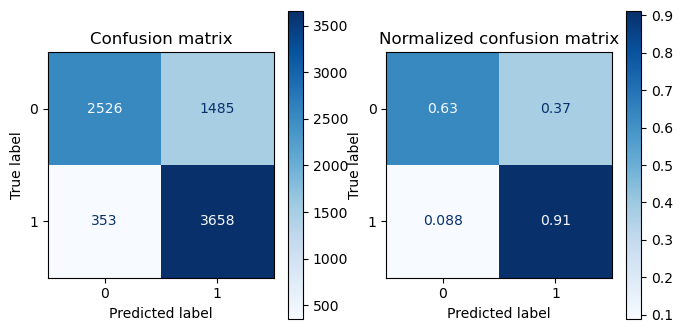

In [47]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction, visualize=True)

In [48]:
from sklearn.preprocessing import Binarizer

threshold = 0.3221556886227545

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

오차 행렬
[[2660 1351]
 [ 421 3590]]
정확도: 0.7791, 정밀도: 0.7266, 재현율: 0.8950, F1: 0.8021, ROC-AUC: 0.7791
################################################################################


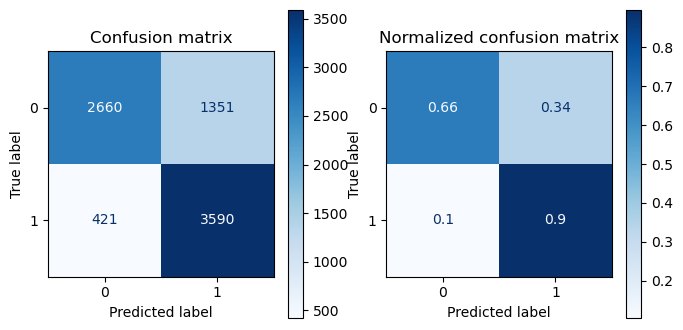

In [49]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction, visualize=True)